### Classical Computation

In [1]:
my_list = [3, 5, 1, 5, 7, 10, 2, 4]

In [2]:
def the_oracle(my_input):
    winner = 10
    if my_input is winner:
        response = True
    else:
        response = False
    return response

In [3]:
for index, trial_number in enumerate(my_list):
    if the_oracle(trial_number) is True:
        print('Winner found at index %i'%index)
        print('%i calls to the Oracle used'%(index+1))
        break

Winner found at index 5
6 calls to the Oracle used


### Quantum Computation

In [4]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#Define the oracle circuit
oracle = QuantumCircuit(2, name = 'oracle')

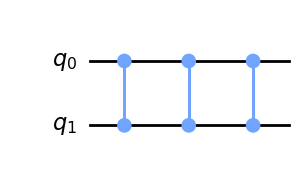

In [10]:
oracle.cz(0, 1)
oracle.to_gate()
oracle.draw(output = 'mpl')

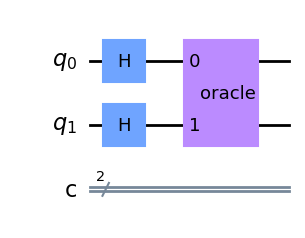

In [11]:
backend = Aer.get_backend('statevector_simulator')
grover_circuit = QuantumCircuit(2, 2)
grover_circuit.h([0, 1])
grover_circuit.append(oracle, [0, 1])
grover_circuit.draw(output = 'mpl')

In [13]:
job = execute(grover_circuit, backend)
result = job.result()

In [14]:
sv = result.get_statevector()
np.around(sv, 2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [15]:
reflection = QuantumCircuit(2, name = 'reflection')
reflection.h([0, 1])
reflection.z([0, 1])
reflection.cz(0, 1)
reflection.h([0, 1])
reflection.to_gate()

Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

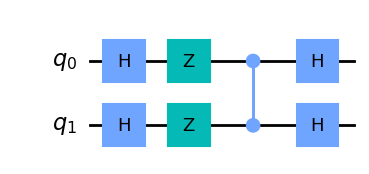

In [17]:
reflection.draw(output='mpl')

In [18]:
backend = Aer.get_backend('qasm_simulator')
grover_circuit = QuantumCircuit(2, 2)
grover_circuit.h([0, 1])
grover_circuit.append(oracle, [0, 1])
grover_circuit.append(reflection, [0, 1])
grover_circuit.measure([0,1], [0, 1])

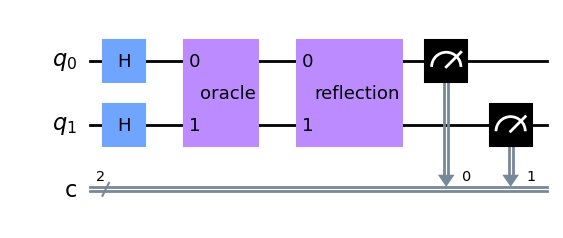

In [19]:
grover_circuit.draw(output = 'mpl')

In [ ]:
job = execute(grover_circuit, backend, shots = 1)
result = job.result()
result.get-count()